Q1) Import the required libraries and dataset

In [1]:
import numpy as np                                      # for mathematical calculations
import pandas as pd                                     # for import and exploratory analysis of data
import matplotlib.pyplot as plt                         # for data visualization                     
import seaborn as sns                                   # for data visualization  
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
honey = pd.read_csv("honeyproduction.csv")
honey

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


Q2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
honey.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [5]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
honey.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [7]:
honey.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [8]:
honey.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [10]:
honey['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

Q3)  Display the percentage distribution of the data in each year using the pie chart.

In [12]:
honey.groupby('year')['year'].agg('count')

year
1998    43
1999    43
2000    43
2001    44
2002    44
2003    44
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

In [18]:
pie_data = honey.groupby('year')['year'].agg('count')/len(honey['year'])*100
pie_data

year
1998    6.869010
1999    6.869010
2000    6.869010
2001    7.028754
2002    7.028754
2003    7.028754
2004    6.549521
2005    6.549521
2006    6.549521
2007    6.549521
2008    6.549521
2009    6.389776
2010    6.389776
2011    6.389776
2012    6.389776
Name: year, dtype: float64

The above values are the percentages of distribution of data per year

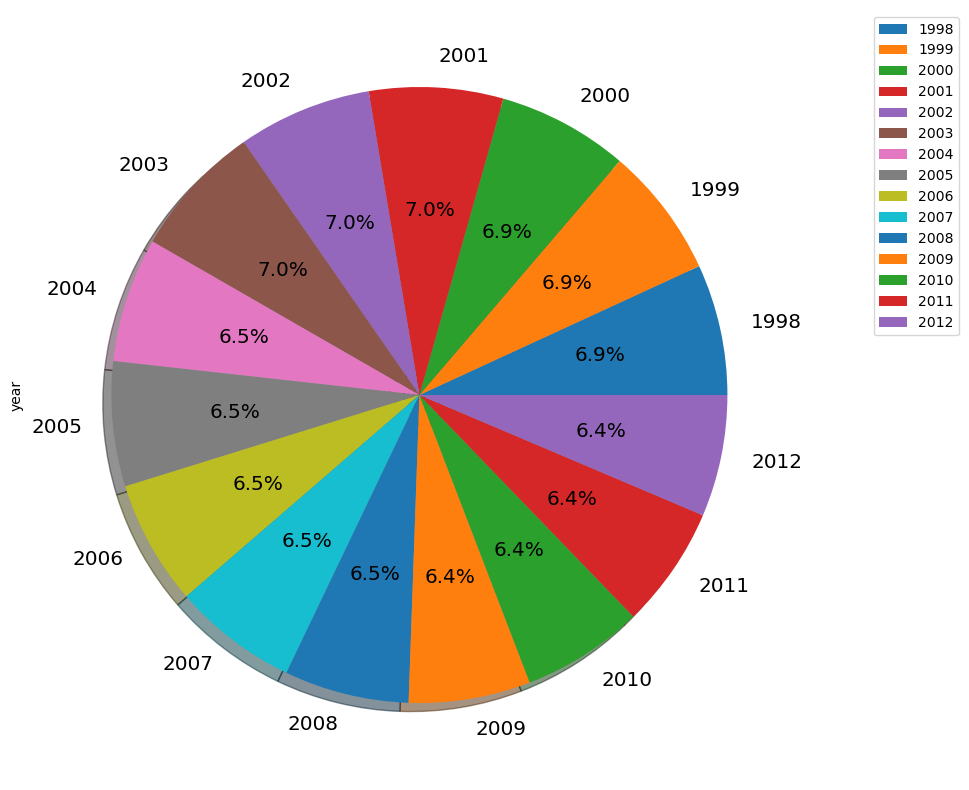

In [24]:
pie_data.plot(kind='pie', y='year',autopct='%1.1f%%',shadow=True,figsize=(10,10),textprops={'size': 'x-large'})
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.71, 0.5))

The above plot shows that the data is distributed almost equally in all the years.

C:\Users\Aravind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


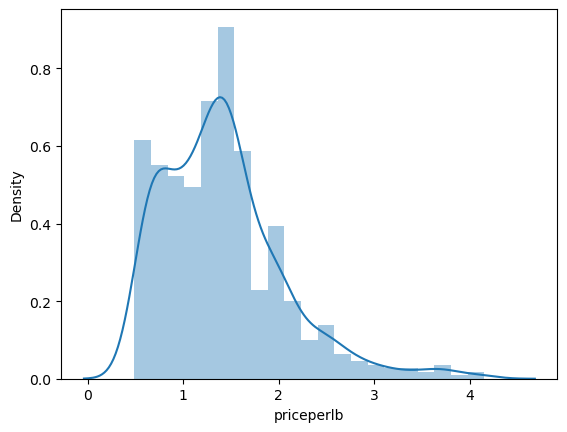

In [26]:
sns.distplot(honey['priceperlb'])
plt.show()

Dist Plot is used to visualize the variation or distribution of the given data. The distribution of data in price per lb can be easily observed from the above plot. By setting kde to true we are setting it to show us the frequency curve and we can clearly notice how the data is being distributed as the average price per lb is increasing. The price per lb indicates average price per pound based on expanded sales. We can infer that the increase in price decreases affordability, hence decreasing the sales.

In [27]:
honey['priceperlb']

0      0.72
1      0.64
2      0.59
3      0.62
4      0.70
       ... 
621    3.77
622    2.38
623    2.91
624    2.05
625    1.87
Name: priceperlb, Length: 626, dtype: float64

Q5) Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

In [28]:
honey[['numcol','prodvalue']]

,numcol,prodvalue
0,16000.0,818000.0
1,55000.0,2112000.0
2,53000.0,2033000.0
3,450000.0,23157000.0
4,27000.0,1361000.0
...,...,...
621,4000.0,618000.0
622,62000.0,6050000.0
623,6000.0,838000.0
624,60000.0,8487000.0


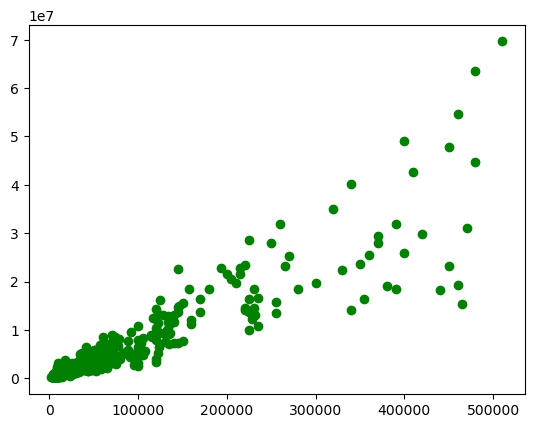

In [31]:
plt.scatter(honey['numcol'], honey['prodvalue'], c ="green")
plt.show()

The scatter plot shows signs of positive correlation between the number of colonies and the prodvalue. The inference that would be ideal for this case can be simply written as  'As there is an increase in the number of colonies, there is an increase in Demand. And thus, with the increase in Demand, the value of the product is increasing'

Q6) Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

Text(0.5, 1.0, 'Relationship b/t Year and prodvalue ')

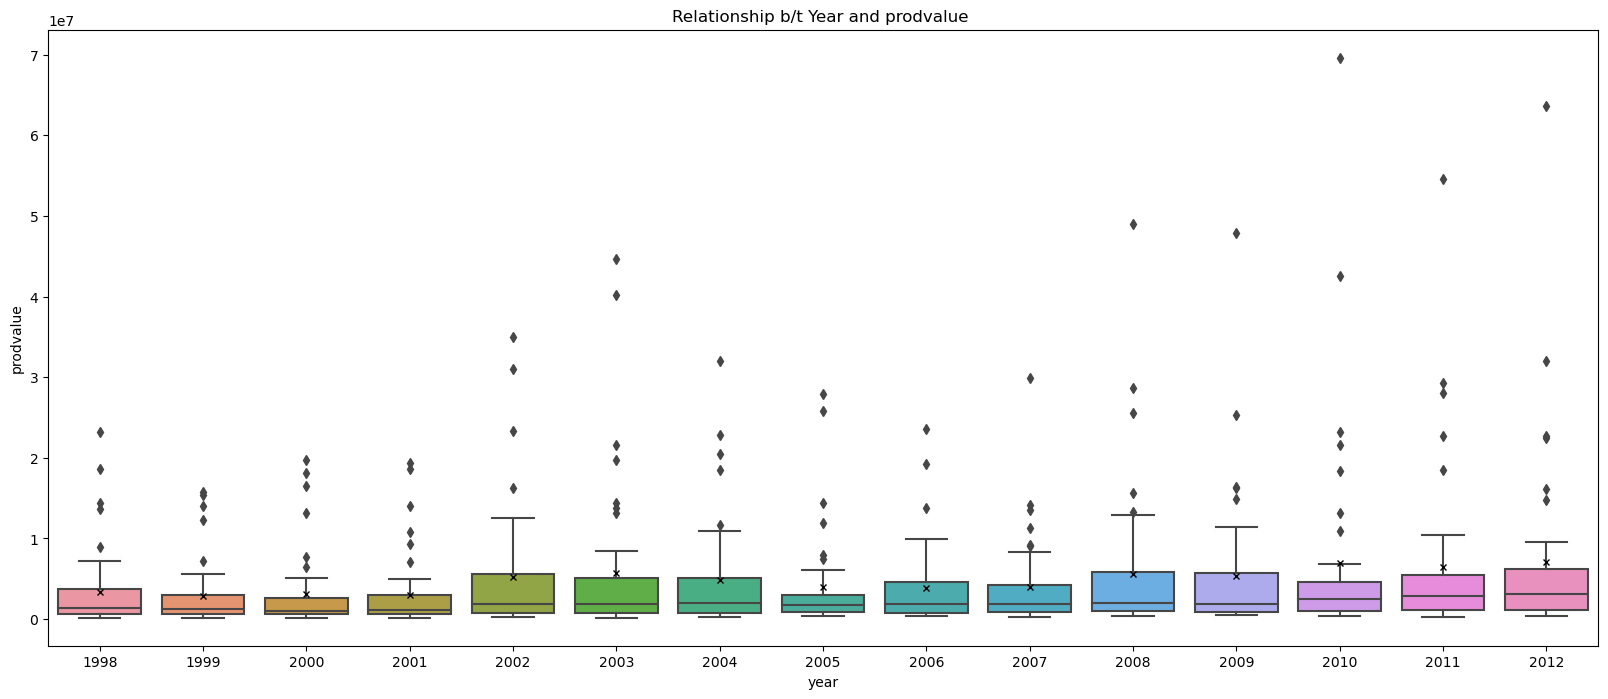

In [39]:
plt.figure(figsize=(20,8))
sns.boxplot(x=honey['year'], y=honey['prodvalue'],showmeans=True,
            meanprops={"marker":"x" ,"markerfacecolor":"black","markersize":"5" ,"markeredgecolor":"black"})
plt.title('Relationship b/t Year and prodvalue ')

The above box-plot clearly shows that the prodvalue in almost all the years hasn't been uniform and has skyrocketed several times each year. But, significantly in the year 2010, the price has rised exceptionally and touched its highest price in all the years of the given data.

Also, from the plot, none of the means are near to the medians. In year 2010, the mean is near to the max price(as per box-plot) and close to Q3 in all the other years. This indicates that none of the data of years and prodvalue are normally skewed.

Q7) Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

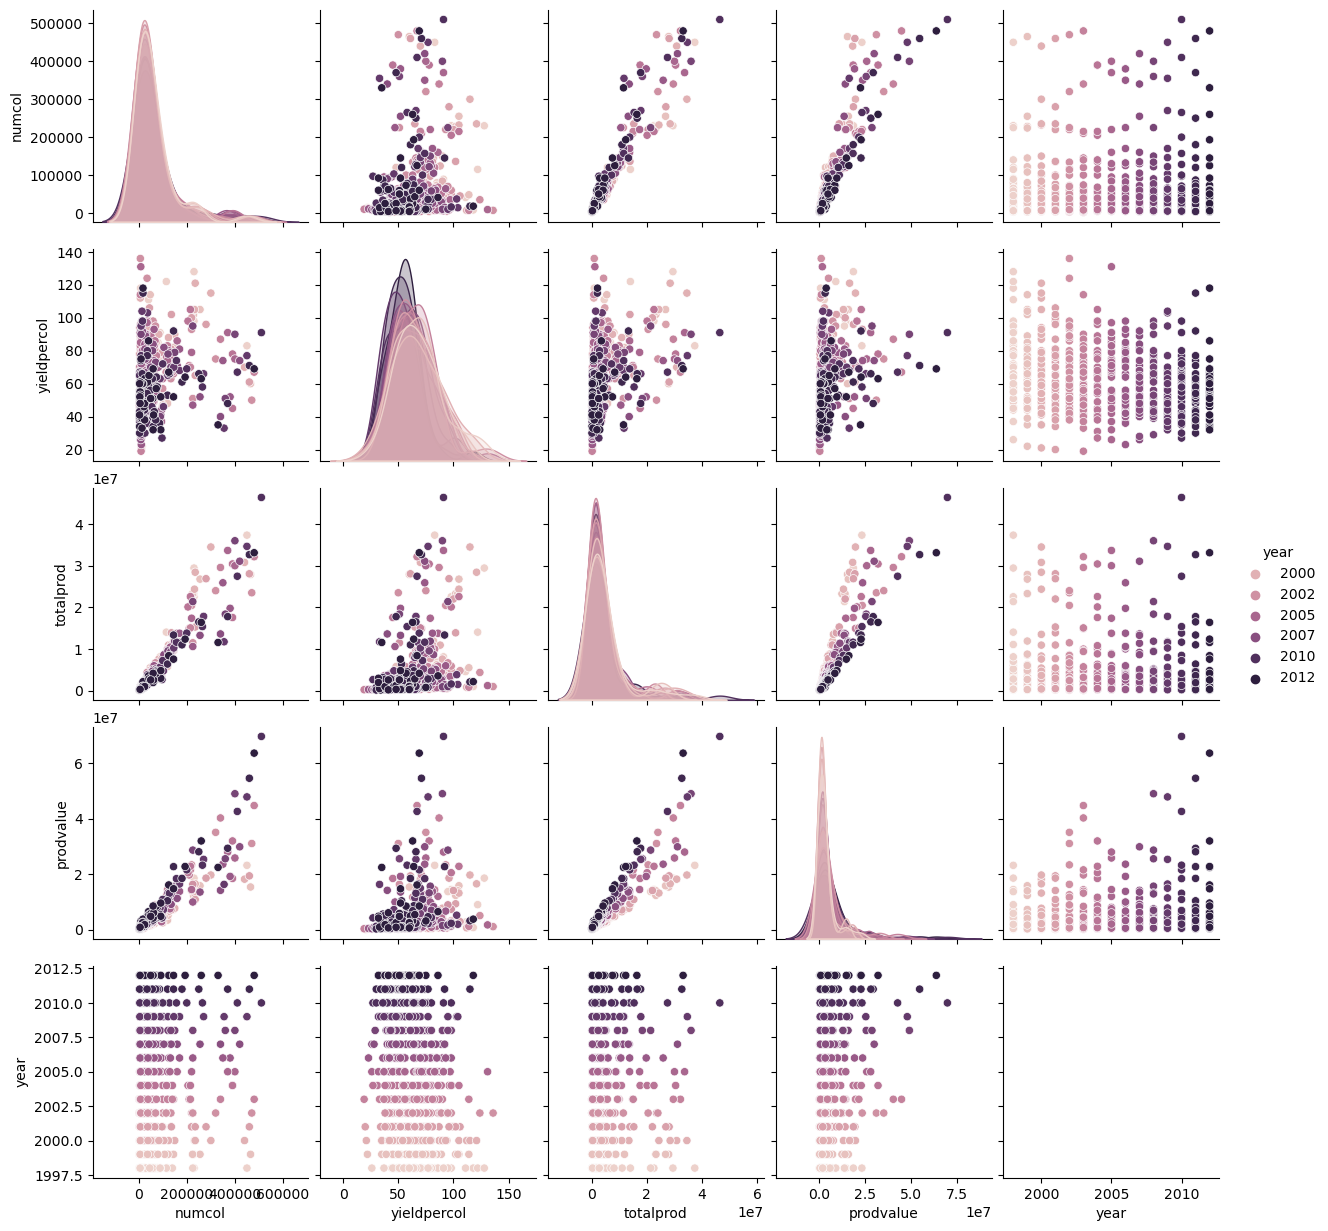

In [36]:
sns.pairplot(honey, vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year'], hue='year')
plt.show()

The above pair plot shows that there is a strong positive correlation between totalprod and numcol.
The plot also shows other positive correlations between numcol and prodvalue, totalprod and prodvalue.

The features numcol, totalprod and prodvalue are skewed(positively) while the feature yieldpercol is almost a normal curve.

Q8) Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

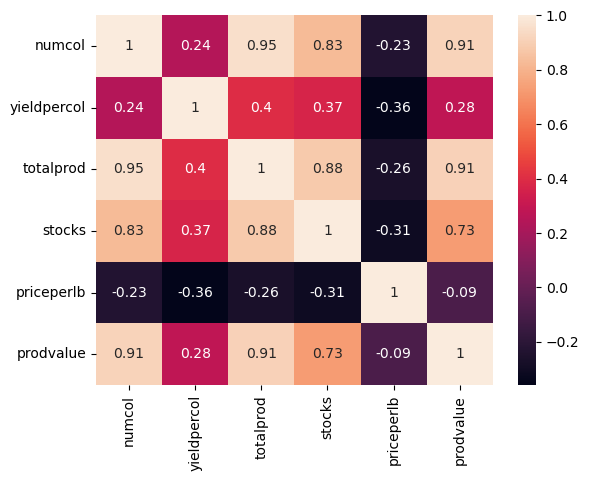

In [38]:
cols = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']

corr = honey[cols].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

The above heatmap gives the same inferences of the pair-plot. In addition, it gives the negative-correlation information of the 'priceperlb' feature with all the other features present in the above heatmap. It can be clearly inferred that the priceperlb is reducing with increase in yieldpercol and also decreases with increase in stock. It is a moderate level negative-correlation. 